In [1]:
import h5py
import numpy as np
import tensorflow
import matplotlib.pyplot as plt

2024-01-26 18:02:21.574654: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


In [2]:
!ls

06_29_23_rootFileAnalysis.ipynb  ParticleTypespt25.h5	 testingDatapt25.h5
jetDatapt25.h5			 sampleDatapt25.h5	 trainingDatapt25.h5
missedSignalPartsDatapt25.h5	 signalPartsDatapt25.h5


## Jet Data

The next two arrays from the .h5 files will have (pT, Eta, Phi, Mass, label) in that order.

In [3]:
with h5py.File("jetDatapt25.h5", "r") as hf:
    jetDataTesSample = hf["Jet Data"][:]

In [4]:
jetDataTesSample.shape

(66, 5)

In [5]:
with h5py.File("sampleDatapt25.h5", "r") as hf:
    jetDataTrainSample = hf["Sample Data"][:] 

In [34]:
np.concatenate((jetDataTesSample, jetDataTrainSample )).shape

(164, 5)

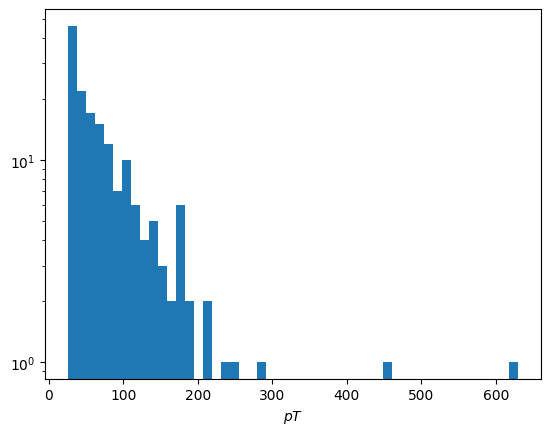

In [6]:
plt.hist(np.concatenate((jetDataTesSample, jetDataTrainSample ))[0:, 0], bins=50)
plt.xlabel("$pT$")
plt.yscale("log")

Text(0.5, 0, '$\\eta$')

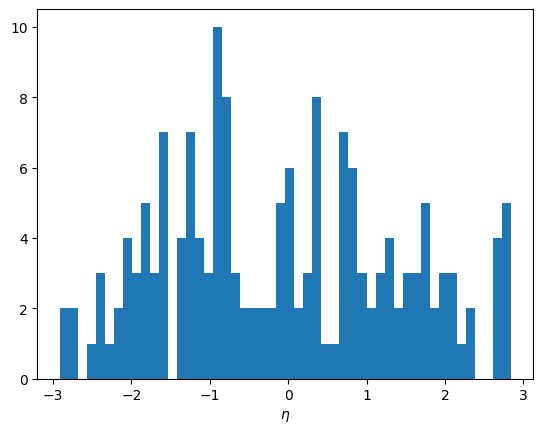

In [7]:
plt.hist(np.concatenate((jetDataTesSample, jetDataTrainSample ))[0:, 1], bins=50)
plt.xlabel("$\eta$")

Text(0.5, 0, '$\\phi$')

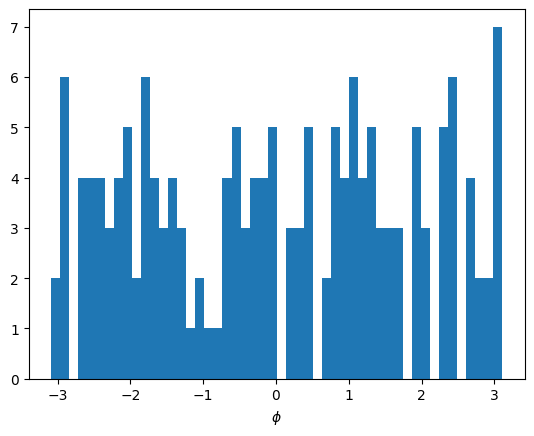

In [8]:
plt.hist(np.concatenate((jetDataTesSample, jetDataTrainSample ))[0:, 2], bins=50)
plt.xlabel("$\phi$")

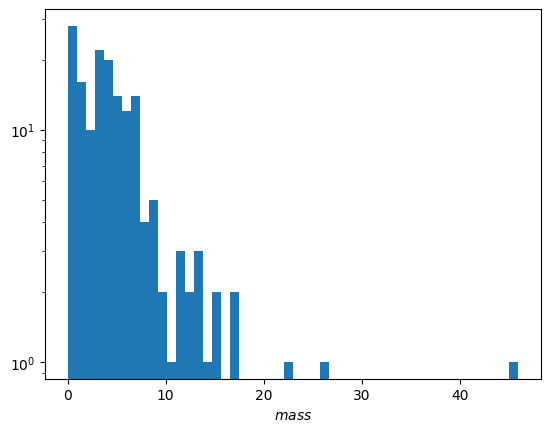

In [9]:
plt.hist(np.concatenate((jetDataTesSample, jetDataTrainSample ))[0:, 3], bins=50)
plt.xlabel("$mass$")
plt.yscale("log")

## Particle Types

In [10]:
import pandas as pd

In [12]:
with h5py.File("ParticleTypespt25.h5", "r") as hf:
    pdgIDs = hf["pdgID"][:]

In [13]:
parts = pd.Series(pdgIDs)

In [35]:
parts.value_counts()

 22     120
 130    118
-211    102
 211     90
-11      16
 11      11
-13       5
 13       5
dtype: int64

Text(0.5, 0, 'counts')

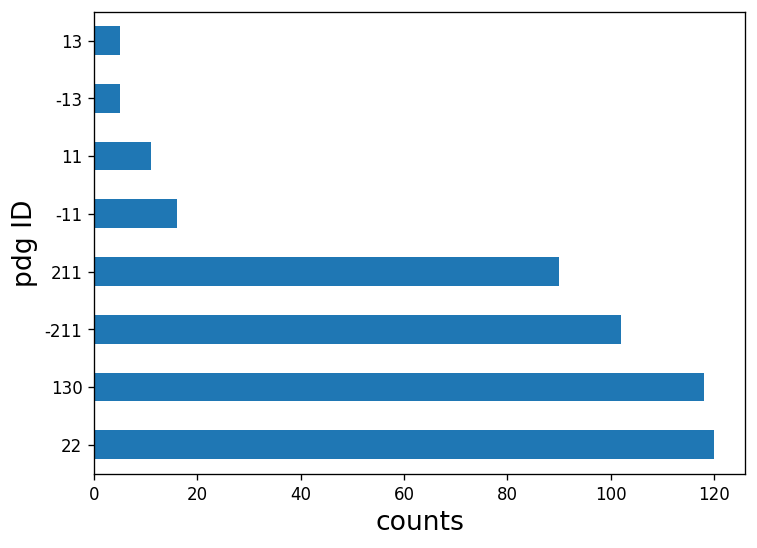

In [14]:
plt.figure(figsize=(7,5), dpi=120)
parts.value_counts().plot(kind="barh")
plt.ylabel("pdg ID", fontsize=16)
plt.xlabel("counts", fontsize=16)

### The above must be wrong. There 164 jets * 10 particles = 16,400 total. So, too few particles are showing up above

## Getting Particles from Actual ROOT files

In [15]:
import ROOT as r

Welcome to JupyROOT 6.30/02


In [16]:
inFile = r.TFile.Open("/home/users/russelld/L1JetTagDaniel/dataForgeScripts/2024testSignal.root", "READ")

In [17]:
inFile.cd()
inFile.ls()

TFile**		/home/users/russelld/L1JetTagDaniel/dataForgeScripts/2024testSignal.root	
 TFile*		/home/users/russelld/L1JetTagDaniel/dataForgeScripts/2024testSignal.root	
  KEY: TDirectoryFile	ntuple0;1	ntuple0


In [18]:
tree = inFile.Get("ntuple0/objects")

In [19]:
tree.Show(0)

======> EVENT:0
 emcalo          = (vector<pair<TLorentzVector,int> >*)0x5591d0920ae0
 egcalo          = (vector<pair<TLorentzVector,int> >*)0x5591cbbac090
 calo            = (vector<pair<TLorentzVector,int> >*)0x5591d0ddc950
 pf              = (vector<pair<TLorentzVector,int> >*)0x5591d0dc24f0
 pup             = (vector<pair<TLorentzVector,int> >*)0x5591d10a8f60
 gen             = (vector<pair<TLorentzVector,int> >*)0x5591d183bd50
 l1jet           = (vector<pair<TLorentzVector,int> >*)0x5591d183bf70
 recojet         = (vector<pair<TLorentzVector,int> >*)0x5591d1693740
 pf_vx           = (vector<float>*)0x5591d08f61b0
 pf_vy           = (vector<float>*)0x5591cf4d4dd0
 pf_vz           = (vector<float>*)0x5591d1861940
 pup_vx          = (vector<float>*)0x5591d0e4e180
 pup_vy          = (vector<float>*)0x5591cf2d0050
 pup_vz          = (vector<float>*)0x5591d0fc81c0
 vz              = (vector<float>*)0x5591d1697fc0


In [20]:
events = tree.GetEntries()
print(events)

90


In [21]:
genParts = []
for entryNum in range(events):
    tree.GetEntry(entryNum)
    obj = tree.gen
    for i in range(len(obj)):
        genParts.append(obj[i][1])

In [22]:
genPs = pd.Series(genParts) 

Text(0.5, 0, 'counts')

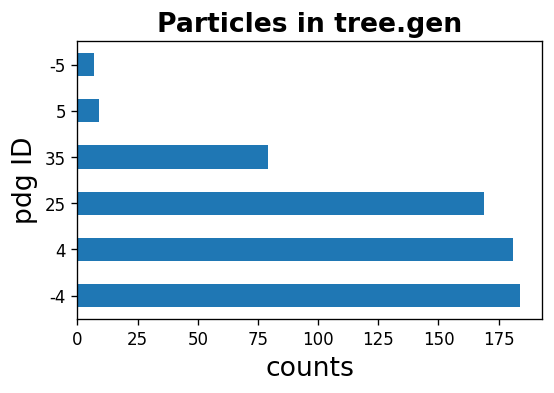

In [29]:
plt.figure(figsize=(5,3), dpi=120)
genPs.value_counts().plot(kind="barh")
plt.title("Particles in tree.gen", fontsize=16, weight="bold")
plt.ylabel("pdg ID", fontsize=16)
plt.xlabel("counts", fontsize=16)

In [24]:
pfParts = []
for entryNum in range(events):
    tree.GetEntry(entryNum)
    obj = tree.pf
    for i in range(len(obj)):
        pfParts.append(obj[i][1])

In [25]:
pfPs = pd.Series(pfParts)

Text(0.5, 0, 'counts')

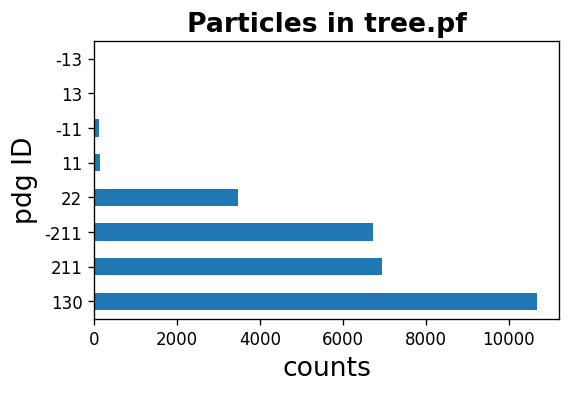

In [30]:
plt.figure(figsize=(5,3), dpi=120)
pfPs.value_counts().plot(kind="barh")
plt.title("Particles in tree.pf", fontsize=16, weight="bold")
plt.ylabel("pdg ID", fontsize=16)
plt.xlabel("counts", fontsize=16)
#plt.xscale("log")

In [27]:
pfPs.value_counts()

 130    10682
 211     6936
-211     6731
 22      3469
 11       146
-11       119
 13        21
-13        15
dtype: int64